# Machine Learning

In this homework we will gain experience on Applied Machine Learning, exploring an interesting dataset about soccer players and referees. 

In [156]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt  
% matplotlib inline
import random
pd.options.mode.chained_assignment = None  # default='warn'
import sklearn as sk
from sklearn import preprocessing, ensemble
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import learning_curve

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [2]:
df = pd.read_csv("CrowdstormingDataJuly1st.csv")

## 1. Data cleaning and exploration

First, let us have a look at the data, with respect to the comprehensive description of it's variable in DATA.md. Here we describe and observe the data (10 first rows).

In [3]:
df.describe()

C:\Users\Mathieu\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [4]:
df.ix[:10,:10]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1


In [5]:
df.ix[:10,10:30]


,ties,defeats,goals,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,1,0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,0,1,0,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,1,0,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,0,0,0,0,0,0,47704.jpg,0.00,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,0,1,0,0,0,0,22356.jpg,1.00,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,1,0,0,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,0,0,0,0,0,0,36499.jpg,0.00,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


### Dyad organization and data disaggregation
The data is actually organized as [dyad](http://en.wikipedia.org/wiki/Dyad_(sociology).


As explained [here](http://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb), the data is organized as dyad, so each row corresponds to a player and a referee relationship. Some players encoutered a referee only once, and some players encoutered a referee several time, but this will still be represented as a single row.

What will be done is to disaggregate the data so that each row corrresponds to one referee-player encouter. To disaggregate, we will use the number of *games*, and consider logically that a maximum of 1 *red card* is possible by encouter.

In [7]:
print(df.shape)
len_disaggregate = sum(df['games']); ## all games
disaggregate = np.zeros(shape = [len_disaggregate, df.shape[1]], dtype=object)
df['allreds']=df['yellowReds']+df['redCards']

j=0
for i, row in df.iterrows():
    row_red = row['allreds']
    for game in range(row['games']):
        row['allreds'] = 1 if (row_red - game > 0) else 0
        disaggregate[j] = row
        j+=1
        
pd.DataFrame(disaggregate, columns=list(df.columns)).to_csv('crowdstorm_disaggregated.csv', index=False, encoding="utf-8") 

(146028, 29)


For clarity, we reload here the disaggregated data in our dataframe.

In [3]:
df = pd.read_csv("crowdstorm_disaggregated.csv", encoding = "utf-8")
nb_dyads = df.size

## Cleaning Data
There is an interesting fact about the dyads to consider : although a referee should have at least 22 relations with players, since a single game implies a minimum of two teams of eleven players, some referees have less (actually, more than half, one can quickly get from the graph), as is shown below:
The interpretation of this oddity is given [in this other take on our dataset](http://nbviewer.jupyter.org/github/mathewzilla/redcard/blob/master/Crowdstorming_visualisation.ipynb).

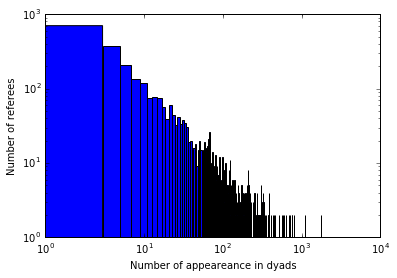

In [4]:
all_refs = df['refNum'].value_counts()
number_all_refs = len(all_refs)
plt.hist(all_refs, log=True, bins = number_all_refs)
plt.xscale('symlog')
plt.ylabel('Number of referees')
plt.xlabel('Number of appeareance in dyads')

From the graph, we can see that around 1000 referees have encoutered less than 10 players. This will be problematic for our analysis, and hence **we will eliminate all the referees that have less than 22 encouters from our dataset**. We are left with 1261 referees, out of our initial N = 3147, wich is only but a little more than a third of our initial set. However, as we further see below, 97.5% of our initial dyads are kept, and therefore our important cleaning step hasn't impaired the integrity of our data.

In [126]:
df=df[df['refNum'].isin(all_refs[all_refs>=22].index.values)]
#number of referees left after cleaning
df['refNum'].unique().size

1258

In [127]:
#percentage of dyads left after cleaning
df.size * 100 / nb_dyads

80.183415695357411

### Null Data
Now let us check whether there are any null data in our set.

In [128]:
df.isnull().any()

playerShort      False
player           False
club             False
leagueCountry    False
birthday         False
height           False
weight           False
position         False
games            False
victories        False
ties             False
defeats          False
goals            False
yellowCards      False
yellowReds       False
redCards         False
photoID          False
rater1           False
rater2           False
refNum           False
refCountry       False
Alpha_3          False
meanIAT          False
nIAT             False
seIAT            False
meanExp          False
nExp             False
seExp            False
allreds          False
dtype: bool

We can see that indeed some data is missing, and this is especially the case for *rater1* and *rater2*. We will drop the rows where said data is missing. We now have lost 20% of our initial data, but the fair 80% left should be clean enough so that we can we can run a good enough analysis on them.

In [129]:
df.count()
df = df.dropna()
df.size * 100 / nb_dyads

80.183415695357411

### Aggregation of the data
We will now reorganize the data, by aggregating it around players.

**Assumptions** :
    - one's club does not change over 1 season.
    - one's position does not change over 1 season.

We need to keep only certain practical player informations. We will hence **drop** some informations that are useless for the rest of the analysis:
    - refNum     (belongs to referee)
    - playerShort (useless - a player's id. We will use it for grouping purpose, and then discard it.)
    - player
    - photoID
    
there are still variables linked to the referees, we will deal with them later.

In [130]:
df_p = df.groupby('playerShort', as_index=False,sort=True)
aggregation = {'club':'max',
               'leagueCountry':'max',
               'refCountry' : 'max',
               'birthday':'max',
               'height':'mean',
               'weight':'mean', 
               'position':'max',
               'games':'sum',
               'victories':'sum',
               'ties':'sum',
               'defeats':'sum',
               'goals':'sum',
               'rater1':'mean',
               'rater2':'mean',
               'yellowCards':'sum',
               'redCards':'sum',
               'meanIAT':'mean',
               'nIAT':'max',
               'seIAT':'mean',
               'meanExp':'mean',
               'nExp':'mean',
               'seExp':'mean'
              }
df_p = df_p.agg(aggregation)
df_p.drop(['playerShort'],inplace=True,axis=1,errors='ignore')
df_p.describe()

,seExp,weight,nIAT,goals,rater1,meanExp,ties,nExp,rater2,refCountry,meanIAT,redCards,yellowCards,victories,height,games,defeats,seIAT
count,1418.000000,1418.000000,1.418000e+03,1418.00000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,0.001399,76.263047,3.543916e+05,211.35402,0.261460,0.444205,436.459803,14634.828780,0.304126,97.186883,0.347126,7.225670,242.483780,820.600141,182.159379,1818.977433,561.917489,0.000293
std,0.001957,7.105262,7.212591e+05,428.63188,0.293726,0.101160,464.389587,20973.932803,0.292711,39.246875,0.014516,13.087291,290.131377,1019.439932,6.799995,1963.852817,573.695929,0.000390
min,0.000037,55.000000,1.021000e+03,0.00000,0.000000,0.065271,0.000000,500.333333,0.000000,3.000000,0.287530,0.000000,0.000000,0.000000,161.000000,1.000000,0.000000,0.000010
25%,0.000547,71.000000,4.479100e+04,14.00000,0.000000,0.361671,124.000000,3310.080483,0.000000,76.000000,0.336628,0.000000,54.000000,197.000000,178.000000,508.000000,173.000000,0.000120
50%,0.001002,76.000000,4.479100e+04,69.00000,0.250000,0.402253,288.000000,7848.075000,0.250000,102.000000,0.340851,1.000000,148.000000,497.000000,182.500000,1204.000000,384.500000,0.000229
75%,0.001437,81.000000,4.479100e+04,221.50000,0.250000,0.551277,581.500000,18138.787157,0.500000,114.000000,0.361154,9.750000,320.000000,1068.750000,187.000000,2426.500000,749.750000,0.000306
max,0.045650,100.000000,1.975803e+06,5141.00000,1.000000,1.031407,3559.000000,414045.840000,1.000000,153.000000,0.396512,121.000000,2361.000000,10092.000000,203.000000,16932.000000,4269.000000,0.009063


In [131]:
df_p.size

31196

### Distributions of skin color indicators
There are 2 indicators for a player's skin color : *rater1* and *rater2*. 
Let's have a look at them

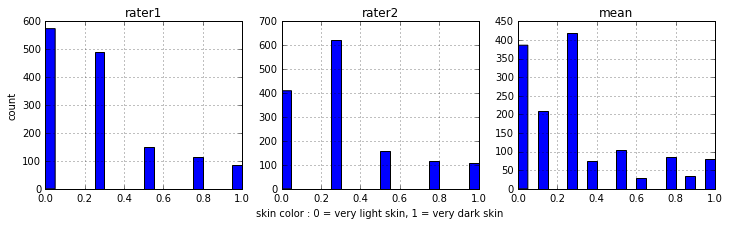

In [132]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(12, 3))
df_p['rater1'].hist(ax=ax[0], bins=20)
ax[0].set_ylabel('count')
ax[0].set_title('rater1')

df_p['rater2'].hist(ax=ax[1], bins=20)
ax[1].set_xlabel('skin color : 0 = very light skin, 1 = very dark skin')
ax[1].set_title('rater2')

#mean
mean_rater = (df_p['rater2'] + df_p['rater1'])/2
(mean_rater).hist(ax=ax[2], bins=20)
ax[2].set_title('mean')


How many different values do we consider with rater1, rater2 and their mean ?

We assign them to 4 classes

In [133]:
values_rater1 = sorted(df_p['rater1'].unique())
print('rater1')
print(values_rater1)
print(len(values_rater1))

values_rater2 = sorted(df_p['rater2'].unique())
print('rater2')
print(values_rater2)
print(len(values_rater2))

value_mean_rater = sorted(mean_rater.unique())
print('mean of rater 1 and rater 2')
print(value_mean_rater)
print(len(value_mean_rater))

# We assign to 4 classes the values
mean_rater[(mean_rater >= 0) & (mean_rater<0.25)] = 0.125
mean_rater[(mean_rater >= 0.25) & (mean_rater<0.45)] = 0.375
mean_rater[(mean_rater >= 0.45) & (mean_rater<0.75)] = 0.625
mean_rater[mean_rater>= 0.75] = 0.875


value_mean_rater = sorted(mean_rater.unique())

print(value_mean_rater)
print(len(value_mean_rater))
 

rater1
[0.0, 0.25, 0.5, 0.75, 1.0]
5
rater2
[0.0, 0.25, 0.5, 0.75, 1.0]
5
mean of rater 1 and rater 2
[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
9
[0.125, 0.375, 0.625, 0.875]
4


Let's create a new column with the mean values of *rater1* and *rater2*

In [134]:
df_p['mean_rater'] = mean_rater
df_p.drop(['rater1','rater2'],inplace=True,axis=1,errors='ignore')


# A VOIR : UTILE ?
#### Manage date data
We will separate the data string into 3 columns.
(We will keep only the months and the year, and create two new columns.) *à voir*

In [19]:
df_p['birthday_day'] = df_p['birthday'].str.split('.',expand=True)[0]
df_p['birthday_month'] = df_p['birthday'].str.split('.',expand=True)[1]
df_p['birthday_year'] = df_p['birthday'].str.split('.',expand=True)[2]
df_p.drop(['birthday'],inplace=True,axis=1,errors='ignore')
df_p.drop(['birthday_day','birthday_month'],inplace=True,axis=1,errors='ignore')
df_p.describe()

,ties,nIAT,yellowCards,games,height,seIAT,meanIAT,seExp,defeats,weight,goals,meanExp,victories,nExp,redCards,mean_rater
count,1418.000000,1.418000e+03,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.00000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000
mean,436.459803,3.543916e+05,242.483780,1818.977433,182.159379,0.000293,0.347126,0.001399,561.917489,76.263047,211.35402,0.444205,820.600141,14634.828780,7.225670,0.363188
std,464.389587,7.212591e+05,290.131377,1963.852817,6.799995,0.000390,0.014516,0.001957,573.695929,7.105262,428.63188,0.101160,1019.439932,20973.932803,13.087291,0.258913
min,0.000000,1.021000e+03,0.000000,1.000000,161.000000,0.000010,0.287530,0.000037,0.000000,55.000000,0.00000,0.065271,0.000000,500.333333,0.000000,0.125000
25%,124.000000,4.479100e+04,54.000000,508.000000,178.000000,0.000120,0.336628,0.000547,173.000000,71.000000,14.00000,0.361671,197.000000,3310.080483,0.000000,0.125000
50%,288.000000,4.479100e+04,148.000000,1204.000000,182.500000,0.000229,0.340851,0.001002,384.500000,76.000000,69.00000,0.402253,497.000000,7848.075000,1.000000,0.375000
75%,581.500000,4.479100e+04,320.000000,2426.500000,187.000000,0.000306,0.361154,0.001437,749.750000,81.000000,221.50000,0.551277,1068.750000,18138.787157,9.750000,0.375000
max,3559.000000,1.975803e+06,2361.000000,16932.000000,203.000000,0.009063,0.396512,0.045650,4269.000000,100.000000,5141.00000,1.031407,10092.000000,414045.840000,121.000000,0.875000


#### Drop columns
Maybe we can drop columns about the referees :
 - à tester
    

In [93]:
#df_p.drop(['nIAT','nExp'],inplace=True,axis=1,errors='ignore')
#df_p.head()

# Machine Learning time !


#### Manage categorical data
We transform categorical data into numerical data

In [138]:
def changeCattoNumerical(x):
    le = preprocessing.LabelEncoder()
    le.fit(x) 
    y = le.transform(x)
    return y

df_p = df_p.copy()
for col in df_p.columns.values:
    df_p[col] = changeCattoNumerical(df_p[col]) 

df_p.head()

,seExp,weight,nIAT,goals,meanExp,leagueCountry,ties,nExp,position,refCountry,...,redCards,birthday,yellowCards,victories,club,height,games,defeats,seIAT,mean_rater
0,300,15,15,101,650,0,762,1144,1,53,...,0,322,186,912,33,20,1159,833,311,0
1,320,17,17,365,519,2,504,874,0,42,...,13,160,297,661,85,21,924,669,353,0
2,392,7,15,298,654,0,695,1142,10,64,...,0,641,152,884,78,3,1109,767,358,1
3,975,20,17,195,789,0,263,1191,3,64,...,1,1076,191,571,6,16,668,367,885,0
4,1225,17,13,7,18,1,179,226,1,42,...,10,677,34,167,48,18,294,176,1279,1


### Preparation of the data
First let's create a vector *X* of features and samples, and a vector *Y* of the labels corresponding. Y will have the value of *mean_rater*

In [65]:
df_y = df_p['mean_rater']

df_x = df_p.copy()
df_x.drop(['mean_rater'],inplace=True,axis=1,errors='ignore')

df_x.head()

,seExp,weight,redCards,birthday,meanExp,yellowCards,victories,club,height,ties,leagueCountry,games,goals,nIAT,position,defeats,seIAT,nExp,meanIAT
0,300,15,0,322,650,186,912,33,20,762,0,1159,101,15,1,833,311,1144,155
1,320,17,13,160,519,297,661,85,21,504,2,924,365,17,0,669,353,874,699
2,392,7,0,641,654,152,884,78,3,695,0,1109,298,15,10,767,358,1142,152
3,975,20,1,1076,789,191,571,6,16,263,0,668,195,17,3,367,885,1191,305
4,1225,17,10,677,18,34,167,48,18,179,1,294,7,13,1,176,1279,226,131


#### Normalize and scale the data

No need to normalise: https://www.quora.com/Should-inputs-to-random-forests-be-normalized

In [412]:
#df_x['nIAT'] = preprocessing.scale(df_x['nIAT'])
#df_x['seIAT'] = preprocessing.scale(df_x['seIAT'])
#df_x['nExp'] = preprocessing.scale(df_x['nExp'])
#df_x['seExp'] = preprocessing.scale(df_x['seExp'])


### Division of the dataset in train/test datasets
we will use a training set containing 80% of the data, and a testing set containing 20% of the data

when specifying *random_state = 0*, we make sure that the splitting is done everytime at the same place. We can remove this option to have a random splitting.

In [42]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=.2, random_state = 0)

df_x_train.shape, df_y_train.shape, df_x_test.shape, df_y_test.shape

((1134, 19), (1134,), (284, 19), (284,))

In [18]:
# TRAIN RANDOM FOREST

# Train model
rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=100)
rand_forest_model.fit(df_x_train,df_y_train)

# Predict from model neigh
y_pred = rand_forest_model.predict(df_x_test)

# Compute accuracy 
accuracy_rand_forest = sk.metrics.accuracy_score(df_y_test,y_pred)

# Print accuracy and exectution time
print(accuracy_rand_forest)



0.528169014085


### Cross validation : finding the best parameters

we will define K = 20 folds.


In [19]:
num_folds = 20

#### 1 hyperparameter : number of trees

Choices for the number of estimators hyperparameter:

In [23]:
number_trees = [10, 50, 100, 150, 200]

In [24]:
rf_scores = []
rf_param = []

#Loop for 1st hyperparameter n_estimators
for number_trees_idx, number_trees_value in enumerate(number_trees):
    
    print('number_trees_idx : ',number_trees_idx+1,'/',len(number_trees))

    # Random forest
    rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=number_trees_value,)

    #Scores
    scores = cross_val_score(rand_forest_model, df_x_train, df_y_train, cv=num_folds, scoring='accuracy')
    rf_scores.append(scores.mean())
    rf_param.append(number_trees_value)
    print(scores.mean())


number_trees_idx :  1 / 5
0.461843096997
number_trees_idx :  2 / 5
0.470414193492
number_trees_idx :  3 / 5
0.458994920188
number_trees_idx :  4 / 5
0.476651318436
number_trees_idx :  5 / 5
0.473092821848


best accuracy:
0.476651318436
best parameter:
150


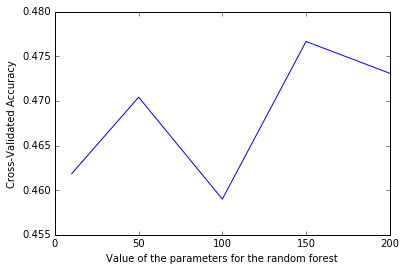

In [25]:
plt.plot(rf_param,rf_scores)
plt.xlabel('Value of the parameters for the random forest')
plt.ylabel('Cross-Validated Accuracy')

idx_best = np.argmax(rf_scores)
print('best accuracy:')
print(np.max(rf_scores))
print('best parameter:')
print(rf_param[idx_best])

#### 2 hyperparameters : number of trees, max_depth

Choices for the number of estimators hyperparameter:

In [26]:
n_estimators_choices = [100,  150, 200]
depth_choices = [5, 10, 15, 20, 25, 30]

num_n_estimators = len(n_estimators_choices)
num_depth = len(depth_choices)


In [27]:
accuracy_tab = np.zeros([num_folds,num_n_estimators])

rf_scores = []
rf_param = []

#Loop for 1st hyperparameter n_estimators
for n_estimators_choices_idx, n_estimators_choices_value in enumerate(n_estimators_choices):
    print('.n_estimators_choices_idx : ',n_estimators_choices_idx+1,'/',num_n_estimators)
    
    #Loop for 2nd hyperparameter max_depth
    for depth_choices_idx, depth_choices_value in enumerate(depth_choices):
        print('..depth_choices_idx : ',depth_choices_idx+1,'/',num_depth)
        
        # Random forest
        rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=n_estimators_choices_value,max_depth=depth_choices_value)
        
        #Scores
        scores = cross_val_score(rand_forest_model, df_x_train, df_y_train, cv=num_folds, scoring='accuracy')
        rf_scores.append(scores.mean())
        rf_param.append([n_estimators_choices_value,depth_choices_value])
        print(scores.mean())


.n_estimators_choices_idx :  1 / 3
..depth_choices_idx :  1 / 6
0.482745698194
..depth_choices_idx :  2 / 6
0.476821493089
..depth_choices_idx :  3 / 6
0.472263220415
..depth_choices_idx :  4 / 6
0.466899417065
..depth_choices_idx :  5 / 6
0.460785558684
..depth_choices_idx :  6 / 6
0.455131502046
.n_estimators_choices_idx :  2 / 3
..depth_choices_idx :  1 / 6
0.484484504391
..depth_choices_idx :  2 / 6
0.476555709048
..depth_choices_idx :  3 / 6
0.466365050058
..depth_choices_idx :  4 / 6
0.483276042339
..depth_choices_idx :  5 / 6
0.473924045709
..depth_choices_idx :  6 / 6
0.464606879094
.n_estimators_choices_idx :  3 / 3
..depth_choices_idx :  1 / 6
0.476693416169
..depth_choices_idx :  2 / 6
0.480036395516
..depth_choices_idx :  3 / 6
0.462449628834
..depth_choices_idx :  4 / 6
0.468561978641
..depth_choices_idx :  5 / 6
0.467084203056
..depth_choices_idx :  6 / 6
0.463248385162


In [28]:

# generate 2 2d grids for the x & y bounds
x,y = np.meshgrid(n_estimators_choices,depth_choices,sparse=True)

z=np.zeros((len(y),len(x[0])))

for s in range(0,len(x[0])):
    for t in range(0,len(y)):
        a=np.transpose(x)[s]
        b=y[t]

        c=rf_param.index([a,b])
        z[t,s]=rf_scores[c]                       
z = z[:-1, :-1]

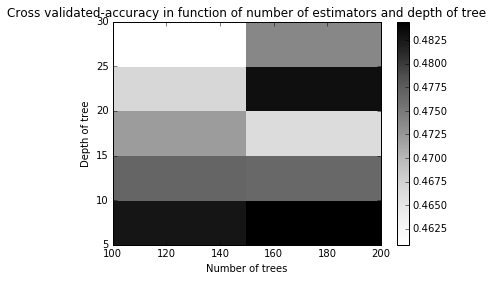

In [29]:

z_min, z_max = np.abs(z).min(), np.abs(z).max()

plt.pcolor(x, y, z, cmap='Greys', vmin=z_min, vmax=z_max)
plt.title('Cross validated-accuracy in function of number of estimators and depth of tree')
# set the limits of the plot to the limits of the data
plt.colorbar()
plt.ylabel('Depth of tree')
plt.xlabel('Number of trees')



The best predictor seem to be found in the simplest random forest, with a depth of 5 and 150 estimators.

Let's retrain this model on the whole dataset.

In [71]:
# Random forest
rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=200)
df_y = np.asarray(df_y, dtype="|S6")
rand_forest_model.fit(df_x,df_y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Plot results of the features importance

Feature ranking:
1. feature seExp (0.072357)
2. feature weight (0.071120)
3. feature redCards (0.069304)
4. feature birthday (0.066399)
5. feature meanExp (0.063712)
6. feature yellowCards (0.060662)
7. feature victories (0.057757)
8. feature club (0.057623)
9. feature height (0.056559)
10. feature ties (0.054573)
11. feature leagueCountry (0.053930)
12. feature games (0.052431)
13. feature goals (0.051910)
14. feature nIAT (0.051208)
15. feature position (0.050065)
16. feature defeats (0.039287)
17. feature seIAT (0.033784)
18. feature nExp (0.022078)
19. feature meanIAT (0.015241)


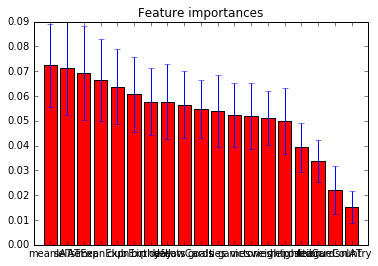

In [44]:
importances = rand_forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_forest_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, df_x.columns[f], importances[indices[f]]))
plt.figure()

plt.title("Feature importances")
plt.bar(range(df_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), df_x.columns[indices])
plt.xlim([-1, df_x.shape[1]])
plt.show()

Let's now remove the features that we assume are the least useful to determine one's skin color.
By retraining the model and verifying its accuracy, we see it has improved slightly.

In [100]:
#df_x.drop(['victories','leagueCountry','birthday_month','birthday_year','birthday_day'],inplace=True,axis=1,errors='ignore')
df_x.drop(['meanIAT','nExp','seIAT','defeats'],inplace=True,axis=1,errors='ignore')

In [101]:
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=.2, random_state = 0)

rand_forest_model.fit(df_x_train,df_y_train)
# Predict from model neigh
y_pred = rand_forest_model.predict(df_x_test)

# Compute accuracy 
accuracy_rand_forest = sk.metrics.accuracy_score(df_y_test,y_pred)

# Print accuracy and exectution time
print(accuracy_rand_forest)

0.521126760563


The random forest will be trained again on the whole set, using the same model parameters.

In [74]:
rand_forest_model.fit(df_x,df_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Let's have a look at the features importance now

Feature ranking:
1. feature seExp (0.154230)
2. feature weight (0.143976)
3. feature redCards (0.115503)
4. feature birthday (0.114969)
5. feature meanExp (0.114422)
6. feature yellowCards (0.113276)
7. feature victories (0.091683)
8. feature club (0.089367)
9. feature height (0.062574)


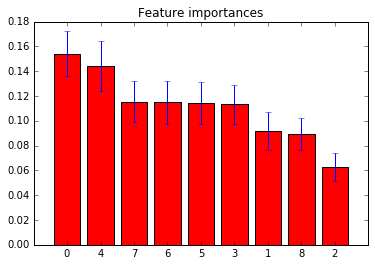

In [34]:
importances = rand_forest_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_forest_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, df_x.columns[f], importances[indices[f]]))
plt.figure()

plt.title("Feature importances")
plt.bar(range(df_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_x.shape[1]), indices)
plt.xlim([-1, df_x.shape[1]])
plt.show()

## Bonus question

Firstly the learning curve of the best model will be plotted. Using the features that could have an importance in determining a footballer's color skin

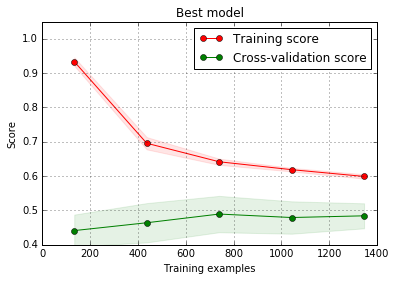

In [105]:
    rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=150,max_depth=5)
    plt.figure()
    plt.title("Best model")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        rand_forest_model, df_x, df_y, cv=20)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    axes = plt.gca()
    axes.set_ylim([0.4,1.05])

    plt.legend(loc="best")




Now the learning curve of the worst model will be plotted

First let's determine which was the worst model

In [103]:
idx_best = np.argmin(rf_scores)
print(np.max(rf_scores))
print(rf_param[idx_best])

0.484484504391
[100, 30]


The worst model was when using 100 trees and a depth of 30

In [91]:
rand_forest_model = sk.ensemble.RandomForestClassifier(n_estimators=100,max_depth=30)


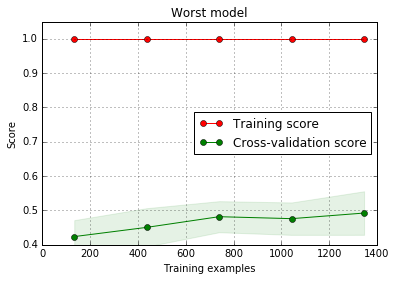

In [92]:
    plt.figure()
    plt.title("Worst model")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        rand_forest_model, df_x, df_y, cv=20)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    axes = plt.gca()
axes.set_ylim([0.4,1.05])

    plt.legend(loc="best")



As it can be seen the worst model was overfitting a lot, having an accuracy of 1 when training and showing a bad performance when testing on a subset of the data it hasn't trained on

# 2. Clustering
Now, we will work on referee information. We come back to our aggregated and cleaned dataframe df_p.

In [136]:
df_p.size

29778

## Aggregating the referee information

In [157]:
plt.figure(figsize=(15, 15))

# Incorrect number of clusters
kmeans_model = KMeans(n_clusters=2, random_state=0).fit_predict(df_p, y=df_p['mean_rater'])

#plt.scatter( df_p.height, df_p.index, c=y_pred)

labels = kmeans_model.labels_
metrics.silhouette_score(df_p, labels, metric='euclidean')

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'